In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from eli5.sklearn import PermutationImportance

In [2]:
seed = 42

In [3]:
rng = np.random.default_rng(seed=seed)

In [4]:
data = pd.read_csv('..\\Data\\ze41_mol_desc_db_red.csv', header=0, sep=';', decimal=',')

In [5]:
data.head()

,compound,inhibition efficiency ZE41 / %,LinIE ZE41,MW,AMW,Mv,Mi,nTA,RBF,nDB,...,CATS3D_06_NL,CATS3D_03_LL,CATS3D_04_LL,CATS3D_05_LL,HOMO / eV,LUMO / eV,Hlgap / eV,Cv / kJ/(mol-K)@293.15K,Cp / kJ/(mol-K)@293.15K,chem_pot / kJ/mol@293.15K
0,3-Amino-124-triazole,-157,0.328,84.10,8.410,0.609,1.199,1.0,0.000,0.0,...,0.0,0.0,0.0,0.0,-5.422,0.078,5.500,0.074309,0.082623,127.67
1,3-methylcatechol,-31,0.693,124.15,7.303,0.620,1.122,3.0,0.000,0.0,...,0.0,1.0,1.0,0.0,-5.311,-0.184,5.127,0.135196,0.143511,269.94
2,3-methylsalicylicacid,75,1.000,152.16,8.008,0.645,1.120,4.0,0.053,1.0,...,0.0,2.0,1.0,0.0,-5.870,-1.812,4.058,0.151551,0.159865,296.04
3,4-aminosalicylicacid,57,0.948,153.15,8.508,0.653,1.132,4.0,0.056,1.0,...,0.0,0.0,0.0,0.0,-5.545,-1.331,4.215,0.152926,0.161240,267.85
4,4-hydroxybenzoicacid,-170,0.290,138.13,8.633,0.670,1.117,3.0,0.063,1.0,...,0.0,0.0,0.0,0.0,-6.198,-1.472,4.726,0.132298,0.140612,225.54


In [6]:
data.describe()

,inhibition efficiency ZE41 / %,LinIE ZE41,MW,AMW,Mv,Mi,nTA,RBF,nDB,nAB,...,CATS3D_06_NL,CATS3D_03_LL,CATS3D_04_LL,CATS3D_05_LL,HOMO / eV,LUMO / eV,Hlgap / eV,Cv / kJ/(mol-K)@293.15K,Cp / kJ/(mol-K)@293.15K,chem_pot / kJ/mol@293.15K
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,-35.766667,0.678900,137.143667,8.309200,0.623217,1.142567,3.500000,0.101417,1.350000,3.083333,...,0.083333,0.350000,0.300000,0.133333,-6.256283,-1.014233,5.19410,0.137386,0.145701,252.594167
std,86.719764,0.251337,37.218170,1.724995,0.065797,0.022984,1.651912,0.081858,1.117276,3.411306,...,0.461819,1.086512,1.030057,0.566484,0.627792,1.220368,0.97891,0.041468,0.041468,109.972648
min,-270.000000,0.000000,46.030000,5.160000,0.485000,1.084000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-7.610000,-3.401000,3.24500,0.035745,0.044059,21.580000
25%,-108.000000,0.470000,116.897500,7.508750,0.577250,1.124500,2.750000,0.051750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-6.675750,-1.812750,4.46050,0.109422,0.117736,192.445000
50%,-6.000000,0.765000,138.130000,8.364000,0.632500,1.145000,4.000000,0.071000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-6.193000,-1.153500,5.03550,0.140831,0.149146,245.535000
75%,37.250000,0.890750,157.950000,8.897250,0.667750,1.158000,4.000000,0.167000,2.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,-5.902750,-0.309500,5.81450,0.152617,0.160931,297.990000
max,75.000000,1.000000,228.130000,16.697000,0.845000,1.203000,7.000000,0.286000,5.000000,12.000000,...,3.000000,7.000000,7.000000,3.000000,-4.496000,1.687000,7.38200,0.256640,0.264954,627.630000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 1263 entries, compound to chem_pot / kJ/mol@293.15K
dtypes: float64(1261), int64(1), object(1)
memory usage: 592.2+ KB


In [8]:
col_names = data.columns
col_names

Index(['compound', 'inhibition efficiency ZE41 / %', 'LinIE ZE41', 'MW', 'AMW',
       'Mv', 'Mi', 'nTA', 'RBF', 'nDB',
       ...
       'CATS3D_06_NL', 'CATS3D_03_LL', 'CATS3D_04_LL', 'CATS3D_05_LL',
       'HOMO / eV', 'LUMO / eV', 'Hlgap / eV', 'Cv / kJ/(mol-K)@293.15K',
       'Cp / kJ/(mol-K)@293.15K', 'chem_pot / kJ/mol@293.15K'],
      dtype='object', length=1263)

In [9]:
X = data[col_names[3:]]

In [10]:
y = data[col_names[2]]

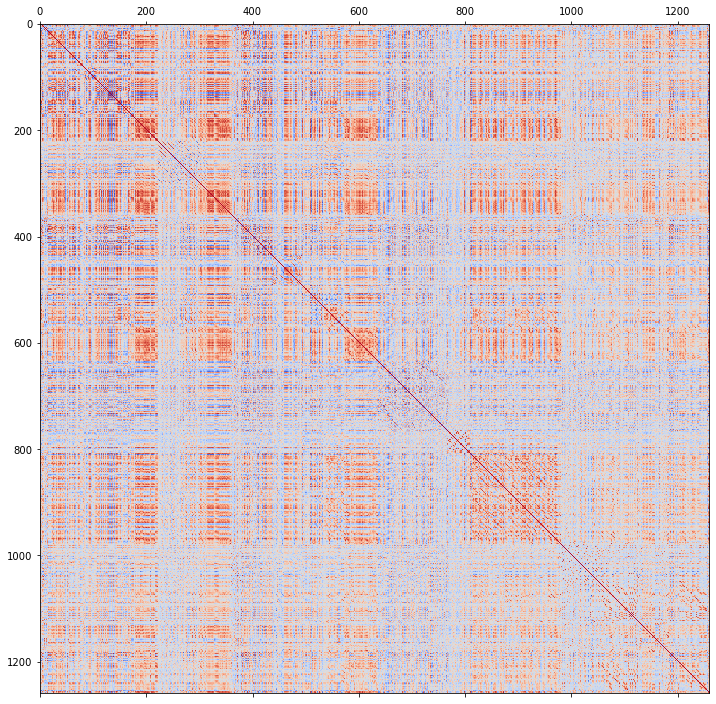

In [11]:
f = plt.figure(figsize=(12, 12))
plt.matshow(X.corr(), fignum=f.number, cmap='coolwarm')
plt.show()

In [12]:
X['random'] = rng.random(size=len(X))

D:\Programme\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
X_scaled = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.1, random_state=seed)

In [15]:
sel = SelectFromModel(RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True, bootstrap=True, random_state=seed))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(n_jobs=-1, oob_score=True,
                                                random_state=42))

In [16]:
selected_feat = X_train.columns[(sel.get_support())]
len(selected_feat)

163

In [17]:
selected_feat[:5]

Index(['Mi', 'D/Dtr06', 'ZM2V', 'MAXDN', 'Psi_i_1d'], dtype='object')

In [18]:
X_reduced = X_scaled[selected_feat]

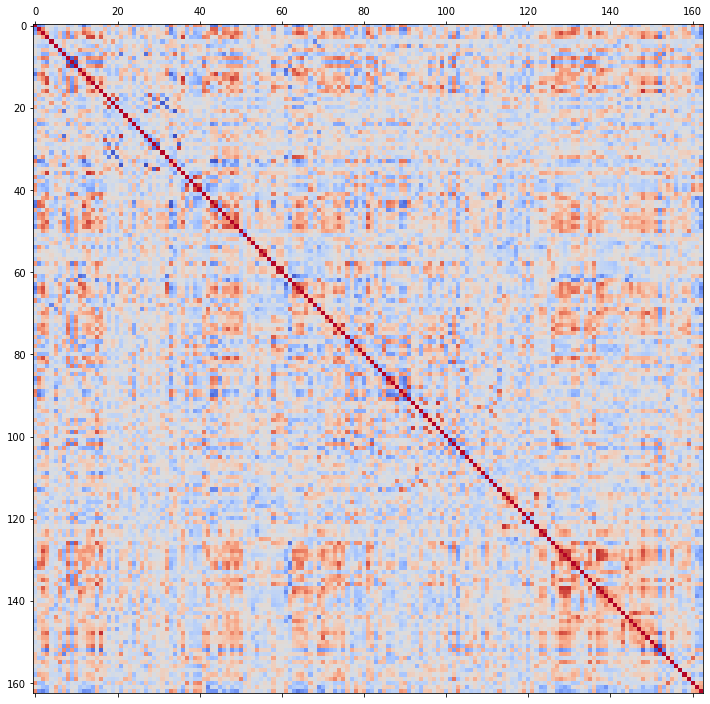

In [19]:
f = plt.figure(figsize=(12, 12))
plt.matshow(X_reduced.corr(), fignum=f.number, cmap='coolwarm')
plt.show()

In [20]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True, bootstrap=True, random_state=seed)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [21]:
feature_importances_sorted, X_col_sorted = zip(*sorted(zip(rf.feature_importances_, X.columns), reverse=True))

In [22]:
X_col_sorted = list(X_col_sorted)
feature_importances_sorted = list(feature_importances_sorted)
for idx in range(10):
    print(feature_importances_sorted[idx], X_col_sorted[idx])

0.08616085071590071 P_VSA_MR_5
0.08097264261269375 LUMO / eV
0.08039379846018982 Mor04m
0.03622418511354693 E1p
0.029411324602046984 CATS3D_02_AP
0.024430260546977237 P_VSA_LogP_2
0.022077937892689293 Mor29v
0.0186084486667554 HOMO / eV
0.016546836686152793 VE1sign_G
0.016315455981039364 GATS5v


In [23]:
X_col_sorted.index('random')

170

In [28]:
y_valid.index

Int64Index([0, 5, 36, 45, 13, 54], dtype='int64')

In [31]:
for i in sorted(y_valid.index):
    print(i, data['compound'].iloc[i])

0 3-Amino-124-triazole
5 4-methylsalicylicacid
13 35-Dinitrosalicylicacid
36 maleicacid
45 para-toluicacid
54 salicylhydrocamicacid


In [32]:
def scaling(x):
    return 345*x - 270

In [35]:
m5 = [[0.4714845 ],
       [0.80819595],
       [0.9395851 ],
       [0.7283148 ],
       [1.1366855 ],
       [0.74633753]]

In [37]:
m5 = [scaling(m[0]) for m in m5]
m5

[-107.33784750000001,
 8.827602749999983,
 54.156859499999996,
 -18.731393999999995,
 122.1564975,
 -12.51355215000001]

In [38]:
m3 = [[0.49898592],
       [0.82241046],
       [0.85183454],
       [0.77957   ],
       [1.1675521 ],
       [0.78562903]]
m3 = [scaling(m[0]) for m in m3]
m3

[-97.84985759999998,
 13.731608699999981,
 23.882916300000034,
 -1.0483500000000276,
 132.8054745,
 1.0420153499999856]

In [39]:
mf = [[0.62264574],
       [0.7720585 ],
       [0.8069314 ],
       [0.6956795 ],
       [0.9567511 ],
       [0.7264972 ]]
mf = [scaling(m[0]) for m in mf]
mf

[-55.187219700000014,
 -3.6398174999999924,
 8.391332999999975,
 -29.990572499999985,
 60.079129499999965,
 -19.35846600000002]

In [42]:
for i in [0, 1, 4, 2, 3, 5]:
    print('m3: {:.2f}, m5: {:.2f}, mf: {:.2f}'.format(m3[i], m5[i], mf[i]))

m3: -97.85, m5: -107.34, mf: -55.19
m3: 13.73, m5: 8.83, mf: -3.64
m3: 132.81, m5: 122.16, mf: 60.08
m3: 23.88, m5: 54.16, mf: 8.39
m3: -1.05, m5: -18.73, mf: -29.99
m3: 1.04, m5: -12.51, mf: -19.36


In [43]:
for i in sorted(y_valid.index):
    print(i, data['inhibition efficiency ZE41 / %'].iloc[i])

0 -157
5 39
13 38
36 12
45 -6
54 -17


In [45]:
m5b = [[0.91113937],
       [0.6657193 ],
       [0.7673371 ],
       [0.6563019 ],
       [0.73494816],
       [0.66173035]]
m5b = [scaling(m[0]) for m in m5b]
m5b = ['{:.2f}'.format(m5b[i]) for i in [0, 1, 4, 2, 3, 5]]
m5b

['44.34', '-40.33', '-16.44', '-5.27', '-43.58', '-41.70']

In [46]:
m3b = [[0.7302396 ],
       [0.63835657],
       [0.7284132 ],
       [0.6388422 ],
       [0.6073277 ],
       [0.62320495]]
m3b = [scaling(m[0]) for m in m3b]
m3b = ['{:.2f}'.format(m3b[i]) for i in [0, 1, 4, 2, 3, 5]]
m3b

['-18.07', '-49.77', '-60.47', '-18.70', '-49.60', '-54.99']